<a href="https://colab.research.google.com/github/Abhilash-Bee/MachineLearning_DeepLearning_Projects/blob/main/ImageClassification/Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Digit Recognizer**

## Data Description

The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.

## Getting the data

In [ ]:
import zipfile

filepath = "/content/drive/MyDrive/Colab Notebooks/Machine Learning Projects/ImageClassification/1. Digit Recognizer/digitrecognizer.zip"

with zipfile.ZipFile(filepath, 'r') as file:
    file.extractall()

In [ ]:
file_dir = '/content/digit-recognizer/'
train_dir = file_dir + 'train.csv'
test_dir = file_dir + 'test.csv'
submission_dir = file_dir + 'sample_submission.csv'

## Importing Dependencies

In [ ]:
!wget https://raw.githubusercontent.com/Abhilash-Bee/MachineLearning_DeepLearning_Projects/main/extras/helper_function.py

--2024-02-24 05:35:33--  https://raw.githubusercontent.com/Abhilash-Bee/MachineLearning_DeepLearning_Projects/main/extras/helper_function.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8113 (7.9K) [text/plain]
Saving to: ‘helper_function.py’

helper_function.py  100%[===================>]   7.92K  --.-KB/s    in 0s      

2024-02-24 05:35:34 (69.2 MB/s) - ‘helper_function.py’ saved [8113/8113]



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from helper_function import *

## Converting data into DataFrame

In [ ]:
train_df = pd.read_csv(train_dir)
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_df = pd.read_csv(test_dir)
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
submission_df = pd.read_csv(submission_dir)
submission_df.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


## EDA

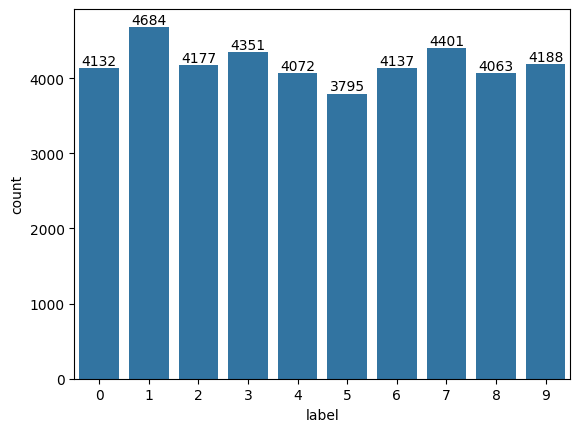

In [ ]:
ax = sns.countplot(train_df, x='label')
ax.bar_label(ax.containers[0]);

## Splitting the data into Features and Lables

In [ ]:
X = train_df.drop('label', axis=1)
y = train_df['label']

X.shape, y.shape

((42000, 784), (42000,))

## Divide the data into 'Train-Test-Split'

In [ ]:
42000 * 0.2

8400.0

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=8)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((33600, 784), (8400, 784), (33600,), (8400,))

## Convert all that data from Dataframe to `28X28` matrix

### Single data conversion

In [ ]:
first_data = np.array(train_df.iloc[0])
first_data[:10]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
label, data = first_data[0], first_data[1:]
label, data[:10]

(1, array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [ ]:
data = data.reshape((28, 28))
data[:5], data.shape

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0, 188, 255,  94,   0,   0,   0,
           0,   0]]),
 (28, 28))

### All data conversion into `28X28`

In [ ]:
X_train_con = []

for _, row in X_train.iterrows():
    X_train_con.append(np.array(row).reshape((28, 28)))

y_train_con = y_train.to_list()

In [ ]:
len(X_train_con), len(y_train_con)

(33600, 33600)

In [ ]:
X_val_con = []

for _, row in X_val.iterrows():
    X_val_con.append(np.array(row).reshape(28, 28))

y_val_con = y_val.to_list()

In [ ]:
len(X_val_con), len(y_val_con)

(8400, 8400)

In [ ]:
test_con = []

for _, row in test_df.iterrows():
    test_con.append(np.array(row).reshape((28, 28)))

In [ ]:
len(test_con)

28000

## Visualize random data from train data

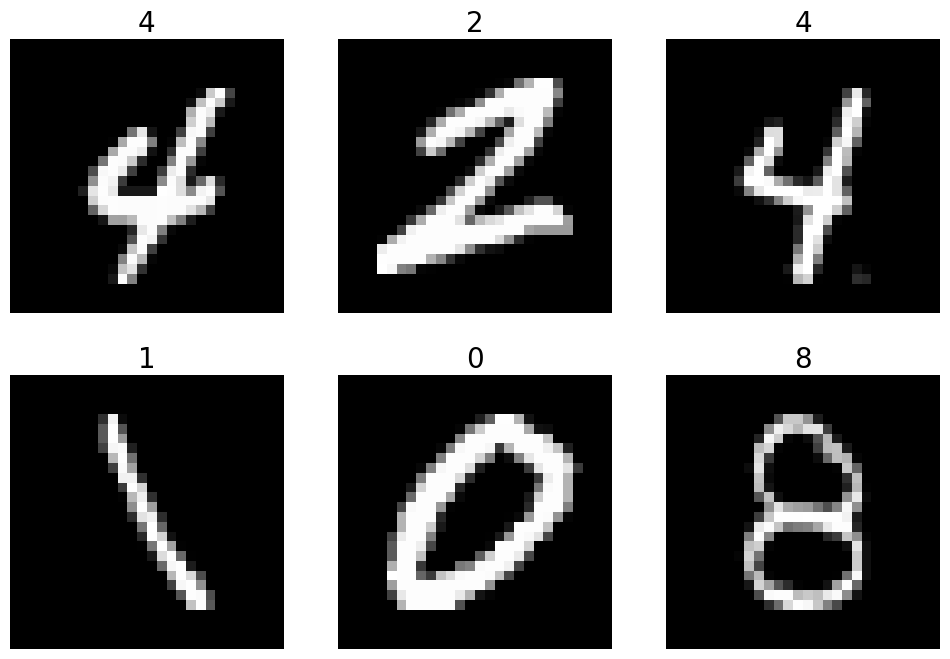

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(12, 8))

for i in range(2):
    for j in range(3):
        rand_no = np.random.randint(0, 33600)
        img = X_train_con[rand_no]
        lbl = y_train_con[rand_no]
        img = img / 255.
        ax[i][j].imshow(img, cmap=plt.cm.binary_r)
        ax[i][j].set_title(lbl, fontsize=20)
        ax[i][j].axis(False)

## Create the tensorflow dataset

In [ ]:
def rescaling(x, y):
    x = tf.cast(x, tf.float32)
    x = x / 255.
    return x, y


def rescaling_test(x):
    x = tf.cast(x, tf.float32)
    x /= 255.
    return x

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = tf.data.Dataset.from_tensor_slices((X_train_con, y_train_con)).map(rescaling, num_parallel_calls=AUTOTUNE)
train_dataset = train_dataset.batch(64).prefetch(AUTOTUNE)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val_con, y_val_con)).map(rescaling, num_parallel_calls=AUTOTUNE)
val_dataset = val_dataset.batch(64).prefetch(AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices(test_con).map(rescaling_test, num_parallel_calls=AUTOTUNE)
test_dataset = test_dataset.batch(64).prefetch(AUTOTUNE)

train_dataset, val_dataset, test_dataset

## Neural Network Dependencies

In [ ]:
overall_results = []

In [ ]:
from tensorflow.keras.layers import (Input,
                                     Dense,
                                     Conv1D,
                                     Conv2D,
                                     Flatten,
                                     MaxPooling2D,
                                     GlobalMaxPooling2D,
                                     AveragePooling2D,
                                     GlobalAveragePooling2D)
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.keras.utils import plot_model

## Creating callbacks

In [ ]:
from datetime import datetime

def modelcheckpoint(experiment_name):
    filepath = 'ModelCheckpoint/' + experiment_name + '/' + datetime.now().strftime('%Y%m%d-%H%M%S')
    return ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True)


def tensorboard(experiment_name):
    log_dir = 'TensorBoard/' + experiment_name + '/' + datetime.now().strftime('%Y%m%d-%H%M%S')
    return TensorBoard(log_dir, write_images=True)

## Built Neural network model using `Dense` layer

In [ ]:
num_classes = len(set(y_train_con))
num_classes

### Building `Sequential` model with 2 hidden `Dense` layers

In [ ]:
# Creating the model
dense_model_1 = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])


# Compiling the model
dense_model_1.compile(optimizer=Adam(),
                      loss=SparseCategoricalCrossentropy(),
                      metrics=['accuracy'])

#### Model summary

In [ ]:
dense_model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 26506 (103.54 KB)
Trainable params: 26506 (103.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Plot the model summary

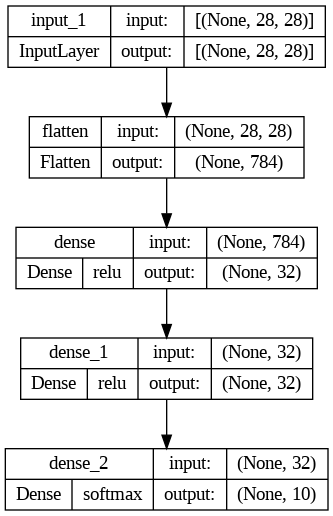

In [ ]:
plot_model(dense_model_1, show_layer_activations=True, show_shapes=True)

#### Fitting the model

In [ ]:
# Fit the model
history_1 = dense_model_1.fit(train_dataset,
                              epochs=10,
                              validation_data=val_dataset,
                              callbacks=[modelcheckpoint('2_layer_dense'),
                                         tensorboard('2_layer_dense')])

Epoch 1/10
516/525 [============================>.] - ETA: 0s - loss: 0.5442 - accuracy: 0.8409
Epoch 1: val_accuracy improved from -inf to 0.91643, saving model to ModelCheckpoint/2_layer_dense/20240223-124955
525/525 [==============================] - 4s 5ms/step - loss: 0.5414 - accuracy: 0.8417 - val_loss: 0.2875 - val_accuracy: 0.9164
Epoch 2/10
523/525 [============================>.] - ETA: 0s - loss: 0.2405 - accuracy: 0.9303
Epoch 2: val_accuracy improved from 0.91643 to 0.93643, saving model to ModelCheckpoint/2_layer_dense/20240223-124955
525/525 [==============================] - 3s 6ms/step - loss: 0.2407 - accuracy: 0.9303 - val_loss: 0.2263 - val_accuracy: 0.9364
Epoch 3/10
518/525 [============================>.] - ETA: 0s - loss: 0.1904 - accuracy: 0.9451
Epoch 3: val_accuracy improved from 0.93643 to 0.94429, saving model to ModelCheckpoint/2_layer_dense/20240223-124955
525/525 [==============================] - 2s 4ms/step - loss: 0.1908 - accuracy: 0.9450 - val_loss

#### Evaluate the results

In [ ]:
results = dense_model_1.evaluate(val_dataset)
results

132/132 [==============================] - 0s 3ms/step - loss: 0.1470 - accuracy: 0.9573


[0.14702986180782318, 0.9572619199752808]

#### Plot the loss and accuracy curve

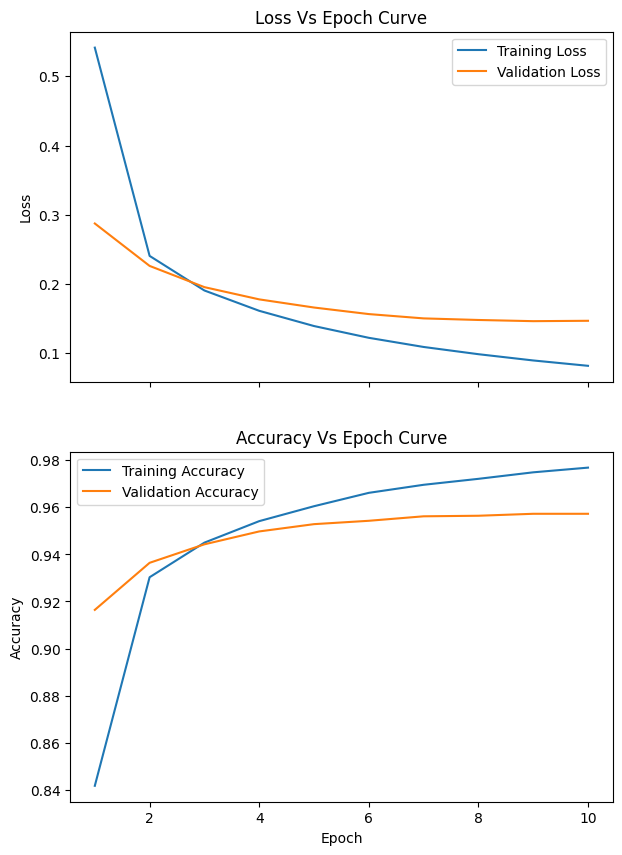

In [ ]:
plot_loss_accuracy_curve(history_1)

#### Prediction with the model

In [ ]:
y_prob = dense_model_1.predict(val_dataset)
y_prob[:3]

132/132 [==============================] - 0s 2ms/step


array([[9.9933904e-01, 9.5329931e-09, 6.1035200e-05, 3.6631841e-06,
        4.4904723e-07, 1.5176593e-04, 1.7552691e-05, 3.1714688e-07,
        2.4797668e-04, 1.7809792e-04],
       [8.8694549e-08, 7.6081333e-06, 2.5961988e-04, 5.9947877e-05,
        1.1849429e-05, 3.3455665e-06, 9.9965703e-01, 8.3400955e-08,
        3.8399656e-07, 9.5820041e-10],
       [1.2898016e-04, 3.9174452e-06, 5.3123167e-06, 3.3105327e-05,
        2.2352565e-04, 1.8480929e-04, 6.6229205e-10, 9.8535734e-01,
        1.8829442e-06, 1.4061260e-02]], dtype=float32)

In [ ]:
y_pred = tf.argmax(y_prob, axis=1).numpy()
y_pred[:10]

array([0, 6, 7, 6, 4, 3, 2, 9, 3, 7])

In [ ]:
y_true = np.array(y_val.to_list())
y_true[:10]

array([0, 6, 7, 6, 4, 3, 2, 9, 3, 7])

#### Plot confusion matrix

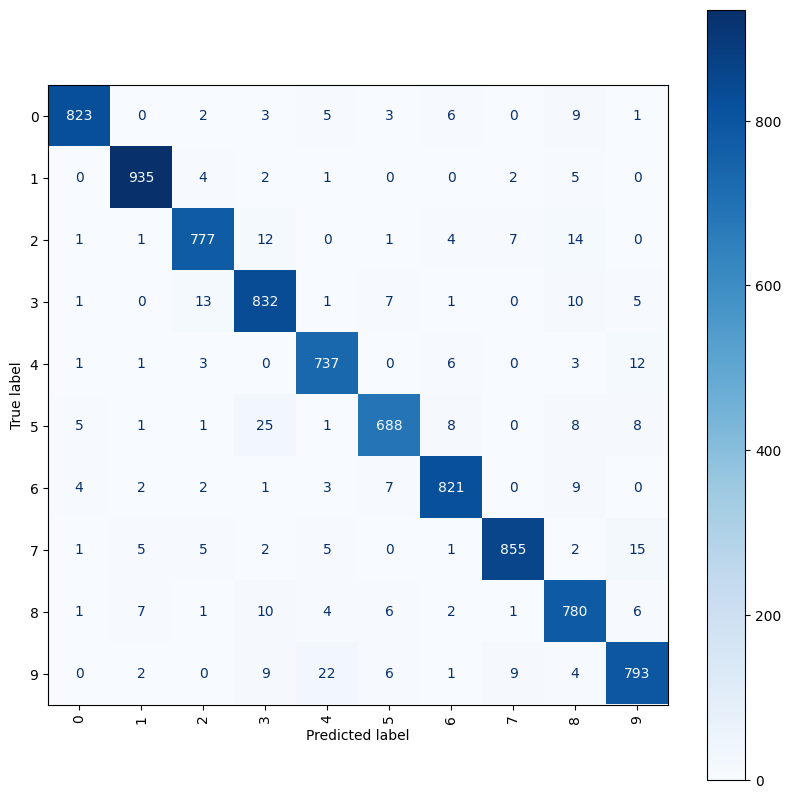

In [ ]:
plot_confusion_matrix(y_true, y_pred)

#### Adding results to overall results

In [ ]:
dense_model_1_results = calculate_results('Dense Model 1', y_true, y_pred)
overall_results.append(dense_model_1_results)
dense_model_1_results

{'Model Name': 'Dense Model 1',
 'Accuracy score': 0.9572619047619048,
 'Precision score': 0.9575470765856023,
 'Recall score': 0.9572619047619048,
 'F1 score': 0.9573010037354491}

### Building `Sequential` model with 4 hidden `Dense` layers.

In [ ]:
# Create the model
dense_model_2 = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])


# Compile the model
dense_model_2.compile(optimizer=Adam(),
                      loss=SparseCategoricalCrossentropy(),
                      metrics=['accuracy'])

#### Model summary

In [ ]:
dense_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 63370 (247.54 KB)
Trainable params: 6337

#### Plot the model summary

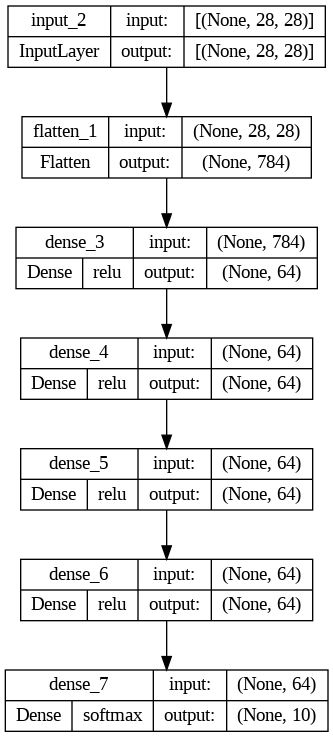

In [ ]:
plot_model(dense_model_2, show_shapes=True, show_layer_activations=True)

#### Fitting the model

In [ ]:
# Fit the model
history_2 = dense_model_2.fit(train_dataset,
                              epochs=10,
                              validation_data=val_dataset,
                              callbacks=[modelcheckpoint('4_layer_dense'),
                                         tensorboard('4_layer_dense')])

Epoch 1/10
523/525 [============================>.] - ETA: 0s - loss: 0.4326 - accuracy: 0.8669
Epoch 1: val_accuracy improved from -inf to 0.93810, saving model to ModelCheckpoint/4_layer_dense/20240223-125122
525/525 [==============================] - 5s 6ms/step - loss: 0.4321 - accuracy: 0.8672 - val_loss: 0.2097 - val_accuracy: 0.9381
Epoch 2/10
517/525 [============================>.] - ETA: 0s - loss: 0.1671 - accuracy: 0.9497
Epoch 2: val_accuracy improved from 0.93810 to 0.95036, saving model to ModelCheckpoint/4_layer_dense/20240223-125122
525/525 [==============================] - 4s 8ms/step - loss: 0.1675 - accuracy: 0.9496 - val_loss: 0.1688 - val_accuracy: 0.9504
Epoch 3/10
520/525 [============================>.] - ETA: 0s - loss: 0.1161 - accuracy: 0.9648
Epoch 3: val_accuracy improved from 0.95036 to 0.95167, saving model to ModelCheckpoint/4_layer_dense/20240223-125122
525/525 [==============================] - 3s 5ms/step - loss: 0.1166 - accuracy: 0.9646 - val_loss

#### Evaluate the model

In [ ]:
results = dense_model_2.evaluate(val_dataset)
results

132/132 [==============================] - 0s 3ms/step - loss: 0.1497 - accuracy: 0.9658


[0.14965040981769562, 0.965833306312561]

#### Plot the loss and accuracy curve

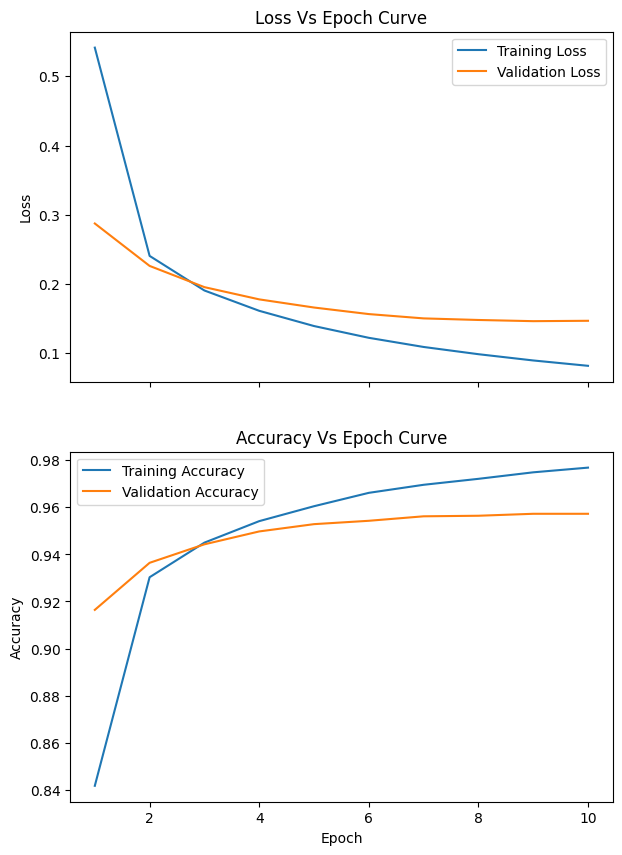

In [ ]:
plot_loss_accuracy_curve(history_1)

#### Prediction with the model

In [ ]:
y_prob = dense_model_2.predict(val_dataset)
y_prob[:3]

132/132 [==============================] - 0s 2ms/step


array([[9.9994385e-01, 1.9161922e-08, 5.8903552e-06, 9.9133715e-09,
        2.5077375e-08, 1.8142741e-07, 2.1273822e-06, 1.4290929e-07,
        3.5625781e-05, 1.2231877e-05],
       [2.5079203e-09, 1.7319111e-10, 6.4614575e-10, 9.1057771e-13,
        8.9136742e-10, 5.7910299e-10, 1.0000000e+00, 2.6112262e-11,
        2.8448383e-10, 3.6834849e-12],
       [2.1101397e-10, 3.8670331e-11, 1.6922722e-10, 3.2192533e-11,
        7.3000166e-08, 1.1053713e-08, 9.4641857e-11, 9.9999988e-01,
        3.7767134e-10, 3.3356059e-08]], dtype=float32)

In [ ]:
y_pred = tf.argmax(y_prob, axis=1).numpy()
y_pred[:10]

array([0, 6, 7, 6, 4, 3, 2, 9, 3, 7])

#### Plot confusion matrix

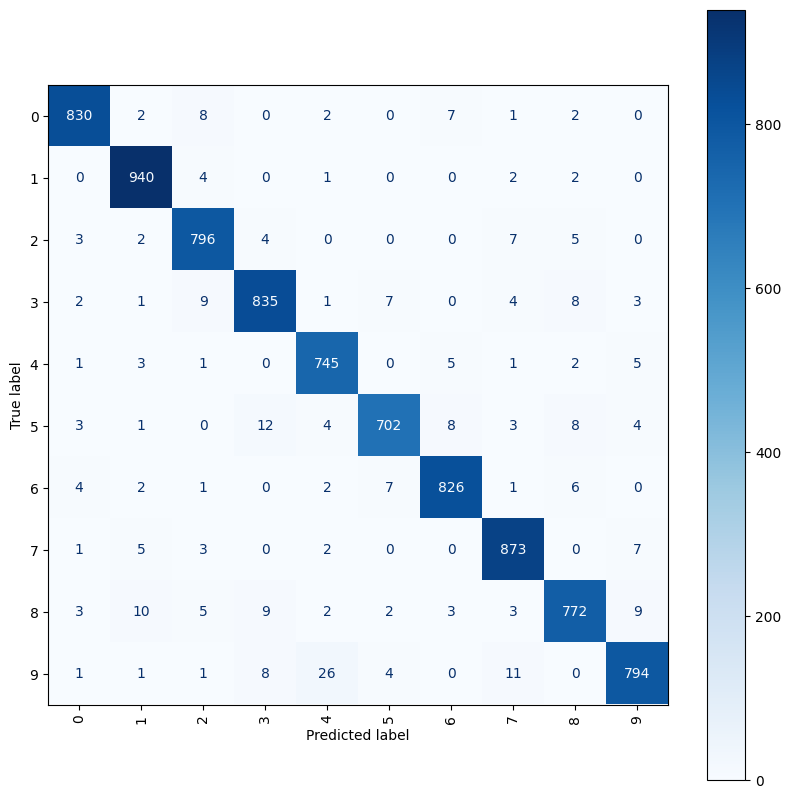

In [ ]:
plot_confusion_matrix(y_true, y_pred)

#### Adding score to overall results

In [ ]:
dense_model_2_results = calculate_results('Dense Model 2', y_true, y_pred)
overall_results.append(dense_model_2_results)
dense_model_2_results

{'Model Name': 'Dense Model 2',
 'Accuracy score': 0.9572619047619048,
 'Precision score': 0.9575470765856023,
 'Recall score': 0.9572619047619048,
 'F1 score': 0.9573010037354491}

### Building `Sequential` model with 3 hidden `Conv1D` layers.

In [ ]:
# Create the model
conv1d_model_1 = Sequential([
    Input(shape=(28, 28)),
    Conv1D(32, 3, activation='relu'),
    Conv1D(32, 3, activation='relu'),
    Conv1D(32, 3, activation='relu'),
    Flatten(),
    Dense(num_classes, activation='softmax')
])


# Compile the model
conv1d_model_1.compile(optimizer=Adam(),
                       loss=SparseCategoricalCrossentropy(),
                       metrics=['accuracy'])

#### Model summary

In [ ]:
conv1d_model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 26, 32)            2720      
                                                                 
 conv1d_1 (Conv1D)           (None, 24, 32)            3104      
                                                                 
 conv1d_2 (Conv1D)           (None, 22, 32)            3104      
                                                                 
 flatten_2 (Flatten)         (None, 704)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                7050      
                                                                 
Total params: 15978 (62.41 KB)
Trainable params: 15978 (62.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Plot the model summary

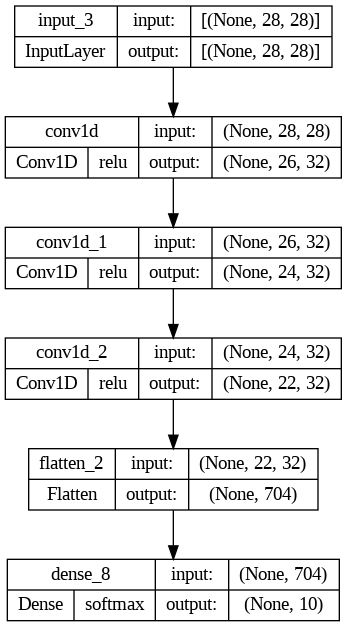

In [ ]:
plot_model(conv1d_model_1, show_shapes=True, show_layer_activations=True)

#### Fitting the model

In [ ]:
history_3 = conv1d_model_1.fit(train_dataset,
                               epochs=10,
                               validation_data=val_dataset,
                               callbacks=[modelcheckpoint('3_layer_conv1d'),
                                          tensorboard('3_layer_conv1d')])

Epoch 1/10
513/525 [============================>.] - ETA: 0s - loss: 0.4097 - accuracy: 0.8790
Epoch 1: val_accuracy improved from -inf to 0.94119, saving model to ModelCheckpoint/3_layer_conv1d/20240223-125247
525/525 [==============================] - 7s 8ms/step - loss: 0.4060 - accuracy: 0.8801 - val_loss: 0.1913 - val_accuracy: 0.9412
Epoch 2/10
516/525 [============================>.] - ETA: 0s - loss: 0.1371 - accuracy: 0.9590
Epoch 2: val_accuracy improved from 0.94119 to 0.95821, saving model to ModelCheckpoint/3_layer_conv1d/20240223-125247
525/525 [==============================] - 3s 6ms/step - loss: 0.1371 - accuracy: 0.9590 - val_loss: 0.1320 - val_accuracy: 0.9582
Epoch 3/10
515/525 [============================>.] - ETA: 0s - loss: 0.0942 - accuracy: 0.9718
Epoch 3: val_accuracy improved from 0.95821 to 0.97083, saving model to ModelCheckpoint/3_layer_conv1d/20240223-125247
525/525 [==============================] - 4s 8ms/step - loss: 0.0941 - accuracy: 0.9718 - val_l

#### Evaluate the model

In [ ]:
results = conv1d_model_1.evaluate(val_dataset)
results

132/132 [==============================] - 0s 3ms/step - loss: 0.0728 - accuracy: 0.9811


[0.072801873087883, 0.981071412563324]

#### Plot the loss and accuracy curve

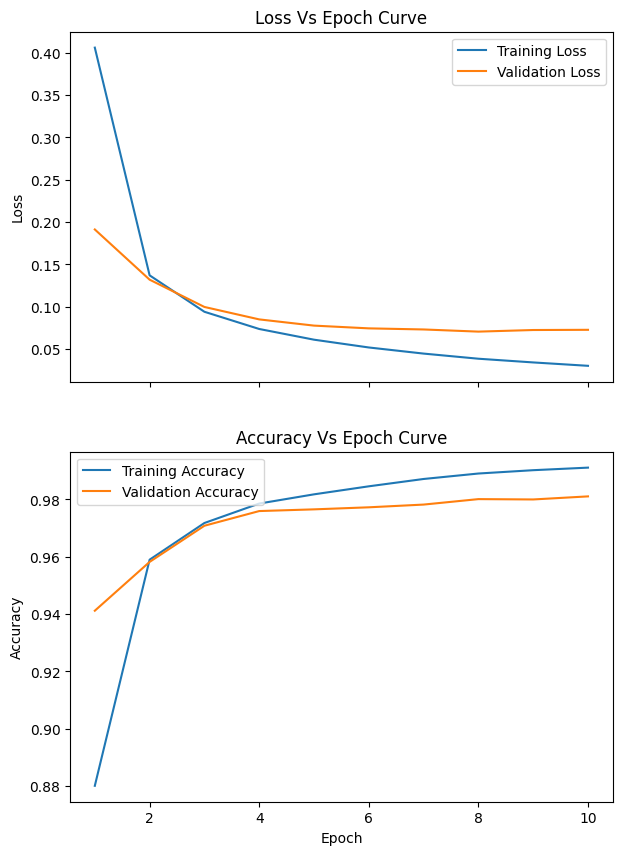

In [ ]:
plot_loss_accuracy_curve(history_3)

#### Prediction with the model

In [ ]:
y_prob = conv1d_model_1.predict(val_dataset)
y_prob[:3]

132/132 [==============================] - 0s 2ms/step


array([[9.99933839e-01, 2.13823141e-13, 4.62755952e-06, 3.12690762e-10,
        1.12034722e-11, 6.28304164e-09, 1.16105838e-07, 7.59297070e-10,
        6.12666627e-05, 8.41580956e-08],
       [1.63616030e-11, 5.16486631e-10, 6.74040768e-10, 8.62521166e-09,
        1.91925542e-09, 1.31892455e-06, 9.99998569e-01, 2.21271740e-17,
        9.65519789e-08, 3.82315097e-14],
       [1.03663975e-08, 2.11355222e-11, 1.08901972e-08, 6.28792782e-11,
        1.91160012e-07, 5.15014662e-08, 1.89049932e-16, 9.99954939e-01,
        2.62717204e-09, 4.48443025e-05]], dtype=float32)

In [ ]:
y_pred = tf.argmax(y_prob, axis=1).numpy()
y_pred[:10]

array([0, 6, 7, 6, 4, 3, 2, 9, 3, 7])

#### Plot confusion matrix

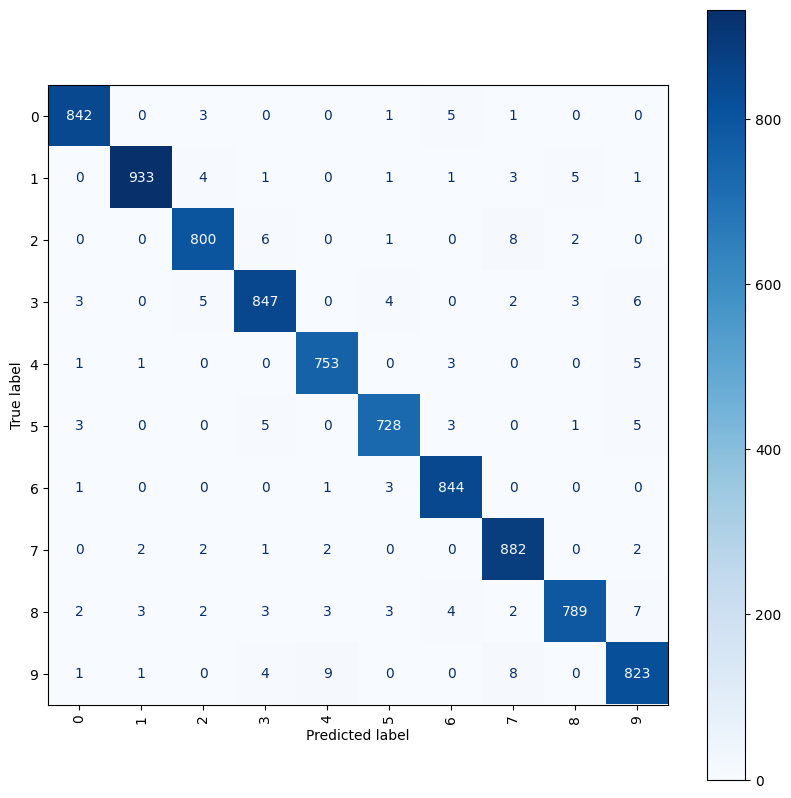

In [ ]:
plot_confusion_matrix(y_true, y_pred)

#### Adding score to overall results

In [ ]:
conv1d_model_1_results = calculate_results('Conv1D Model 1', y_true, y_pred)
overall_results.append(conv1d_model_1_results)
conv1d_model_1_results

{'Model Name': 'Conv1D Model 1',
 'Accuracy score': 0.9810714285714286,
 'Precision score': 0.9811108235892234,
 'Recall score': 0.9810714285714286,
 'F1 score': 0.9810631851626987}

### Building `Sequential` model with 4 hidden `Conv1D` layers.

In [ ]:
# Creating the model
conv1d_model_2 = Sequential([
    Input(shape=(28, 28)),
    Conv1D(64, 3, activation='relu'),
    Conv1D(64, 3, activation='relu'),
    Conv1D(64, 3, activation='relu'),
    Conv1D(64, 3, activation='relu'),
    Flatten(),
    Dense(num_classes, activation='softmax')
])


# Compile the model
conv1d_model_2.compile(optimizer=Adam(),
                       loss=SparseCategoricalCrossentropy(),
                       metrics=['accuracy'])

#### Model Summary

In [ ]:
conv1d_model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 26, 64)            5440      
                                                                 
 conv1d_4 (Conv1D)           (None, 24, 64)            12352     
                                                                 
 conv1d_5 (Conv1D)           (None, 22, 64)            12352     
                                                                 
 conv1d_6 (Conv1D)           (None, 20, 64)            12352     
                                                                 
 flatten_3 (Flatten)         (None, 1280)              0         
                                                                 
 dense_9 (Dense)             (None, 10)                12810     
                                                                 
Total params: 55306 (216.04 KB)
Trainable params: 5530

#### Plot the model summary

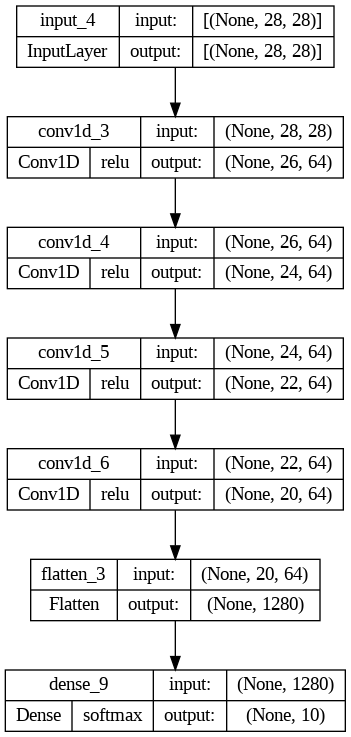

In [ ]:
plot_model(conv1d_model_2, show_shapes=True, show_layer_activations=True)

#### Fitting the model

In [ ]:
# Fit the model
history_4 = conv1d_model_2.fit(train_dataset,
                               epochs=10,
                               validation_data=val_dataset,
                               callbacks=[modelcheckpoint('4_layer_conv1d'),
                                          tensorboard('4_layer_conv1d')])

Epoch 1/10
522/525 [============================>.] - ETA: 0s - loss: 0.2942 - accuracy: 0.9117
Epoch 1: val_accuracy improved from -inf to 0.95845, saving model to ModelCheckpoint/4_layer_conv1d/20240223-125443
525/525 [==============================] - 7s 9ms/step - loss: 0.2934 - accuracy: 0.9119 - val_loss: 0.1387 - val_accuracy: 0.9585
Epoch 2/10
522/525 [============================>.] - ETA: 0s - loss: 0.0923 - accuracy: 0.9726
Epoch 2: val_accuracy improved from 0.95845 to 0.97440, saving model to ModelCheckpoint/4_layer_conv1d/20240223-125443
525/525 [==============================] - 3s 6ms/step - loss: 0.0921 - accuracy: 0.9726 - val_loss: 0.0837 - val_accuracy: 0.9744
Epoch 3/10
523/525 [============================>.] - ETA: 0s - loss: 0.0644 - accuracy: 0.9809
Epoch 3: val_accuracy improved from 0.97440 to 0.97560, saving model to ModelCheckpoint/4_layer_conv1d/20240223-125443
525/525 [==============================] - 5s 9ms/step - loss: 0.0643 - accuracy: 0.9809 - val_l

#### Evaluate the model

In [ ]:
results = conv1d_model_2.evaluate(val_dataset)
results

132/132 [==============================] - 0s 3ms/step - loss: 0.0735 - accuracy: 0.9827


[0.07348563522100449, 0.9827380776405334]

#### Plot the loss and accuracy curve

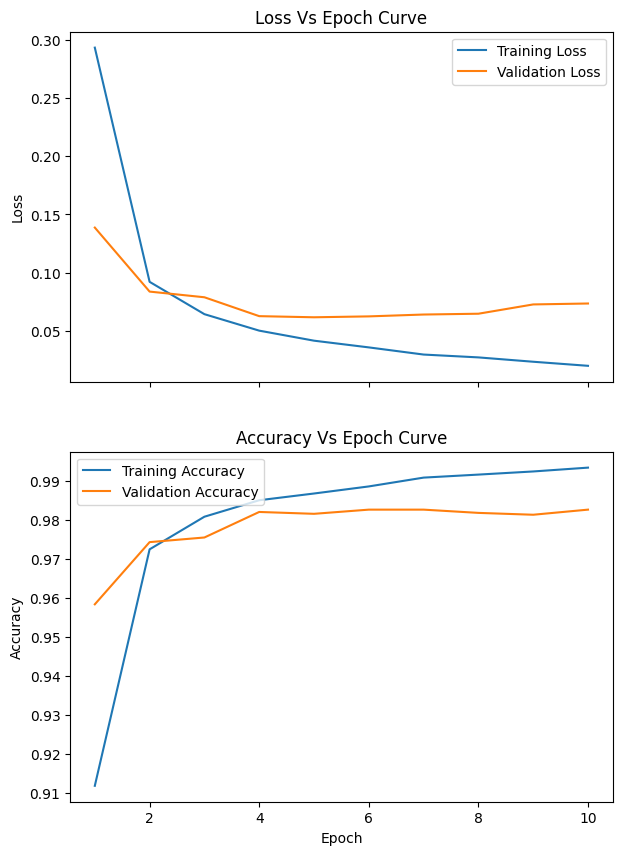

In [ ]:
plot_loss_accuracy_curve(history_4)

#### Prediction with the model

In [ ]:
y_prob = conv1d_model_2.predict(val_dataset)
y_prob[:3]

132/132 [==============================] - 0s 3ms/step


array([[9.9997354e-01, 1.1576247e-15, 6.1745993e-08, 1.3673039e-13,
        5.6255707e-14, 4.8424445e-11, 4.3209356e-09, 3.7348471e-12,
        2.6235033e-05, 1.4616009e-07],
       [5.2490325e-11, 1.9352059e-12, 5.4283983e-10, 3.5535351e-08,
        4.6568449e-08, 1.3435289e-07, 9.9999881e-01, 1.3226150e-18,
        1.0062628e-06, 2.6697322e-15],
       [1.1777019e-13, 3.4156629e-12, 5.0857978e-13, 2.4812366e-16,
        1.8236685e-08, 6.0593663e-10, 3.5983975e-22, 9.9997842e-01,
        2.1611591e-11, 2.1585003e-05]], dtype=float32)

In [ ]:
y_pred = tf.argmax(y_prob, axis=1).numpy()
y_pred[:10]

array([0, 6, 7, 6, 4, 3, 2, 9, 3, 7])

#### Plot confusion matrix

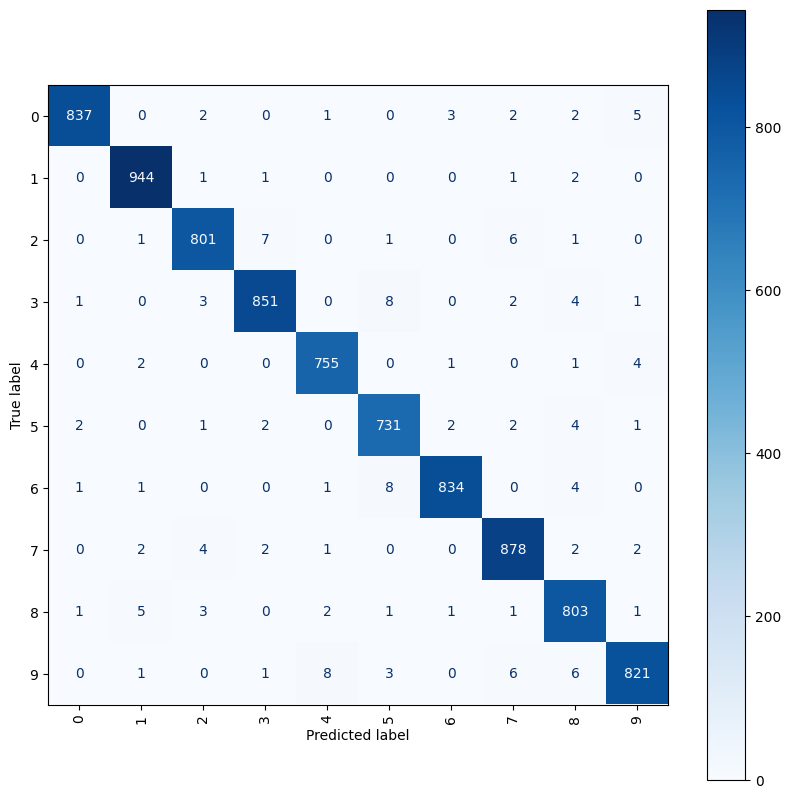

In [ ]:
plot_confusion_matrix(y_true, y_pred)

#### Adding score to overall results

In [ ]:
conv1d_model_2_results = calculate_results('Conv1D Model 2', y_true, y_pred)
overall_results.append(conv1d_model_2_results)
conv1d_model_2_results

{'Model Name': 'Conv1D Model 2',
 'Accuracy score': 0.9827380952380952,
 'Precision score': 0.9827897430546982,
 'Recall score': 0.9827380952380952,
 'F1 score': 0.9827424262943019}

### Building `Sequential` model with 2 hidden `Conv2D` layers and 1 `GlobalMaxPooling2D` layer.

In [ ]:
# Create the model
conv2d_model_1 = Sequential([
    Input(shape=(28, 28)),
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1)),
    Conv2D(32, 3, activation='relu'),
    Conv2D(32, 3, activation='relu'),
    GlobalMaxPooling2D(),
    Dense(num_classes, activation='softmax')
])


# Compile the model
conv2d_model_1.compile(optimizer=Adam(),
                       loss=SparseCategoricalCrossentropy(),
                       metrics=['accuracy'])

#### Model summary

In [ ]:
conv2d_model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 global_max_pooling2d (Glob  (None, 32)                0         
 alMaxPooling2D)                                                 
                                                                 
 dense_10 (Dense)            (None, 10)                330       
                                                                 
Total params: 9898 (38.66 KB)
Trainable params: 9898 (38.66 KB)
Non-trainable params: 0 (0.00 Byte)
____________________

#### Plot the model summary

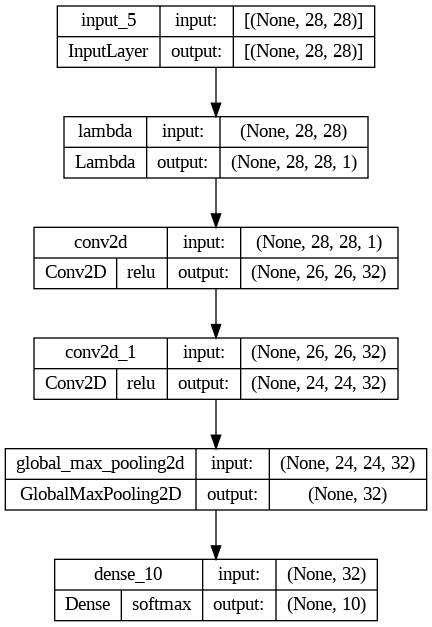

In [ ]:
plot_model(conv2d_model_1, show_shapes=True, show_layer_activations=True)

#### Fitting the model

In [ ]:
# Fit the model
history_5 = conv2d_model_1.fit(train_dataset,
                               epochs=10,
                               validation_data=val_dataset,
                               callbacks=[modelcheckpoint('2_layers_conv2d'),
                                          tensorboard('2_layers_conv2d')])

Epoch 1/10
515/525 [============================>.] - ETA: 0s - loss: 1.2695 - accuracy: 0.6205
Epoch 1: val_accuracy improved from -inf to 0.81250, saving model to ModelCheckpoint/2_layers_conv2d/20240223-125658
525/525 [==============================] - 4s 6ms/step - loss: 1.2580 - accuracy: 0.6238 - val_loss: 0.6130 - val_accuracy: 0.8125
Epoch 2/10
522/525 [============================>.] - ETA: 0s - loss: 0.5114 - accuracy: 0.8399
Epoch 2: val_accuracy improved from 0.81250 to 0.85988, saving model to ModelCheckpoint/2_layers_conv2d/20240223-125658
525/525 [==============================] - 3s 6ms/step - loss: 0.5116 - accuracy: 0.8399 - val_loss: 0.4389 - val_accuracy: 0.8599
Epoch 3/10
525/525 [==============================] - ETA: 0s - loss: 0.4128 - accuracy: 0.8696
Epoch 3: val_accuracy improved from 0.85988 to 0.88155, saving model to ModelCheckpoint/2_layers_conv2d/20240223-125658
525/525 [==============================] - 4s 8ms/step - loss: 0.4128 - accuracy: 0.8696 - va

#### Evaluate the model

In [ ]:
results = conv2d_model_1.evaluate(val_dataset)
results

132/132 [==============================] - 0s 3ms/step - loss: 0.2501 - accuracy: 0.9217


[0.2500929832458496, 0.92166668176651]

#### Plot the loss and accuracy curve

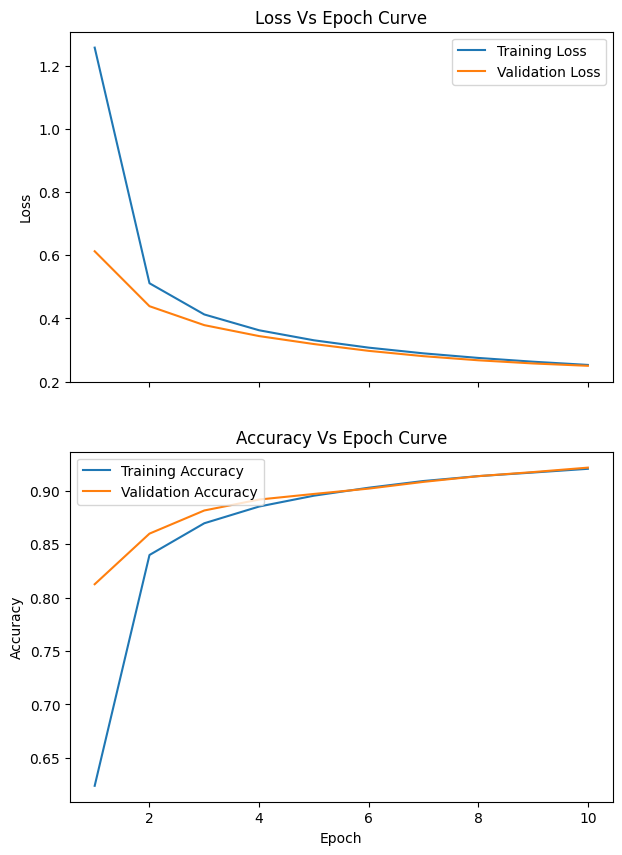

In [ ]:
plot_loss_accuracy_curve(history_5)

#### Prediction with the model

In [ ]:
y_prob = conv2d_model_1.predict(val_dataset)
y_prob[:3]

132/132 [==============================] - 0s 3ms/step


array([[5.8453262e-01, 2.9184487e-06, 4.4827140e-04, 3.8180669e-04,
        1.9959027e-05, 1.4485728e-02, 6.2475044e-02, 5.8085050e-05,
        3.3590344e-01, 1.6921151e-03],
       [3.0721775e-03, 2.8024321e-08, 2.5629524e-06, 2.7109437e-10,
        1.4793068e-06, 9.6495160e-07, 9.9685293e-01, 7.6543638e-10,
        6.7155059e-05, 2.7007072e-06],
       [3.3890165e-06, 6.9293694e-04, 2.6575680e-07, 1.0174776e-07,
        7.7930803e-05, 2.1649548e-08, 3.3422864e-08, 9.7640276e-01,
        3.3407170e-07, 2.2822194e-02]], dtype=float32)

In [ ]:
y_pred = tf.argmax(y_prob, axis=1).numpy()
y_pred[:10]

array([0, 6, 7, 6, 3, 3, 2, 9, 3, 7])

#### Plot confusion matrix

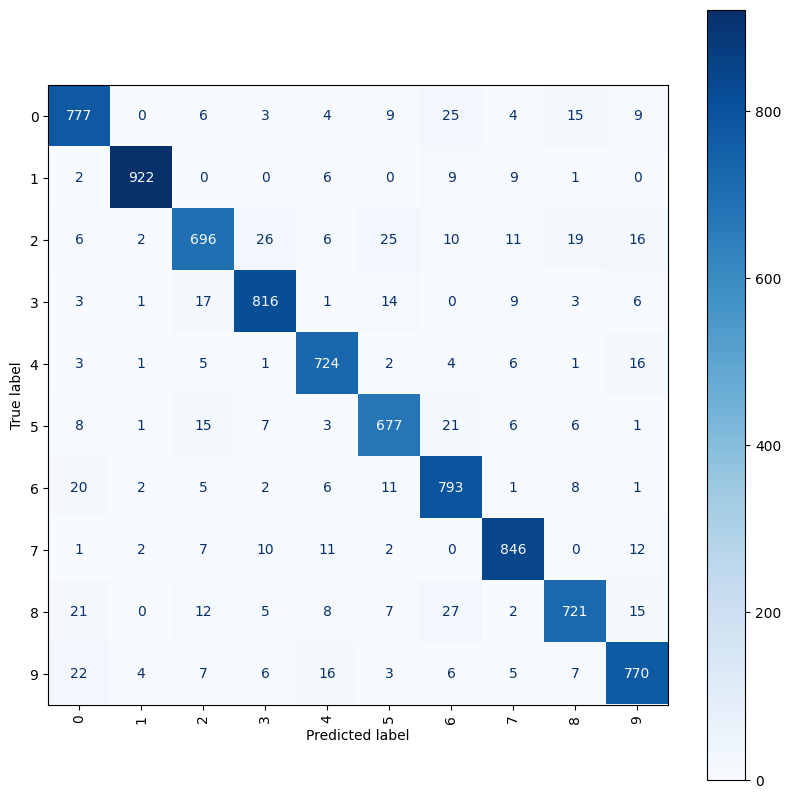

In [ ]:
plot_confusion_matrix(y_true, y_pred)

#### Adding score to overall results

In [ ]:
conv2d_model_1_results = calculate_results('Conv2D Model 1', y_true, y_pred)
overall_results.append(conv2d_model_1_results)
conv2d_model_1_results

{'Model Name': 'Conv2D Model 1',
 'Accuracy score': 0.9216666666666666,
 'Precision score': 0.921888500472028,
 'Recall score': 0.9216666666666666,
 'F1 score': 0.9215605597298265}

### Building `Sequential` model with 4 hidden `Conv2D` layers, 1 `MaxPooling2D` layer and `GlobalMaxPooling2D` layer.

In [ ]:
# Create the model
conv2d_model_2 = Sequential([
    Input(shape=(28, 28)),
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1)),
    Conv2D(128, 5, activation='relu', padding='same'),
    Conv2D(128, 5, activation='relu', padding='same'),
    Conv2D(128, 5, activation='relu', padding='same'),
    Conv2D(128, 5, activation='relu', padding='same'),
    MaxPooling2D(),
    Conv2D(128, 5, activation='relu', padding='same'),
    Conv2D(128, 5, activation='relu', padding='same'),
    Conv2D(128, 5, activation='relu', padding='same'),
    Conv2D(128, 5, activation='relu', padding='same'),
    GlobalMaxPooling2D(),
    Dense(num_classes, activation='softmax')
])


# Compile the model
conv2d_model_2.compile(optimizer=Adam(),
                       loss=SparseCategoricalCrossentropy(),
                       metrics=['accuracy'])

#### Model summary

In [ ]:
conv2d_model_2.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_18 (Lambda)          (None, 28, 28, 1)         0         
                                                                 
 conv2d_92 (Conv2D)          (None, 28, 28, 128)       3328      
                                                                 
 conv2d_93 (Conv2D)          (None, 28, 28, 128)       409728    
                                                                 
 conv2d_94 (Conv2D)          (None, 28, 28, 128)       409728    
                                                                 
 conv2d_95 (Conv2D)          (None, 28, 28, 128)       409728    
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 128)       0         
 g2D)                                                            
                                                     

#### Plot the model summary

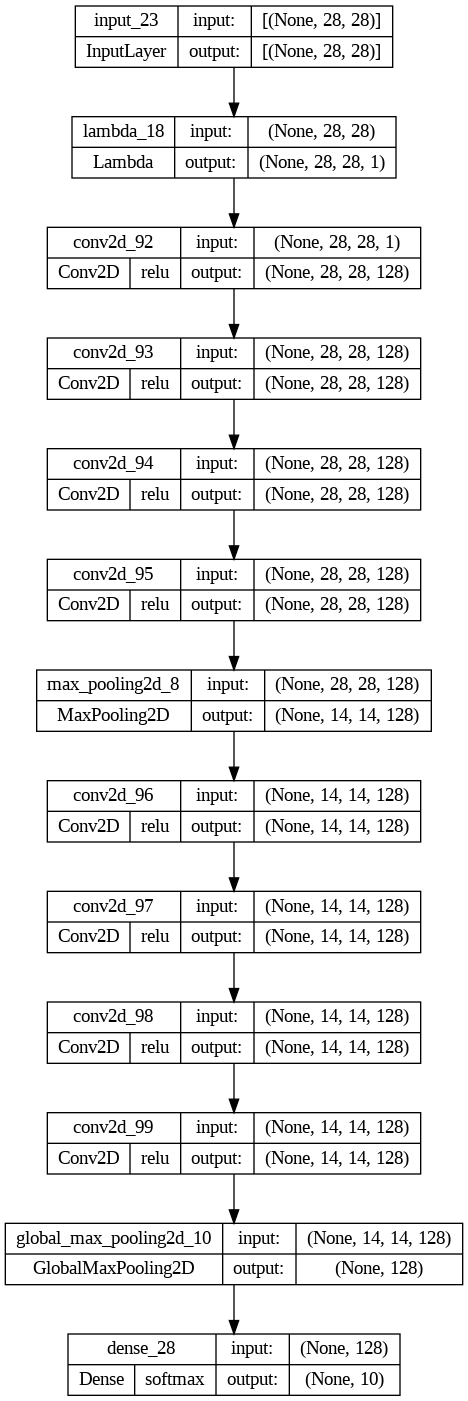

In [ ]:
plot_model(conv2d_model_2, show_shapes=True, show_layer_activations=True)

#### Fitting the model

In [ ]:
# Fit the model
history_6 = conv2d_model_2.fit(train_dataset,
                               epochs=15,
                               validation_data=val_dataset,
                               callbacks=[modelcheckpoint('4_layers_conv2d'),
                                          tensorboard('4_layers_conv2d')])

Epoch 1/15
525/525 [==============================] - ETA: 0s - loss: 0.3517 - accuracy: 0.8796
Epoch 1: val_accuracy improved from -inf to 0.97667, saving model to ModelCheckpoint/4_layers_conv2d/20240223-133927
525/525 [==============================] - 27s 44ms/step - loss: 0.3517 - accuracy: 0.8796 - val_loss: 0.0817 - val_accuracy: 0.9767
Epoch 2/15
525/525 [==============================] - ETA: 0s - loss: 0.0693 - accuracy: 0.9787
Epoch 2: val_accuracy improved from 0.97667 to 0.98369, saving model to ModelCheckpoint/4_layers_conv2d/20240223-133927
525/525 [==============================] - 23s 44ms/step - loss: 0.0693 - accuracy: 0.9787 - val_loss: 0.0553 - val_accuracy: 0.9837
Epoch 3/15
525/525 [==============================] - ETA: 0s - loss: 0.0522 - accuracy: 0.9842
Epoch 3: val_accuracy did not improve from 0.98369
525/525 [==============================] - 23s 43ms/step - loss: 0.0522 - accuracy: 0.9842 - val_loss: 0.0555 - val_accuracy: 0.9830
Epoch 4/15
525/525 [=====

#### Evaluate the model

In [ ]:
conv2d_model_2.load_weights('/content/ModelCheckpoint/4_layers_conv2d/20240223-133927')

In [ ]:
results = conv2d_model_2.evaluate(val_dataset)
results

132/132 [==============================] - 2s 14ms/step - loss: 0.0332 - accuracy: 0.9913


[0.03317084535956383, 0.9913095235824585]

#### Plot the loss and accuracy curve

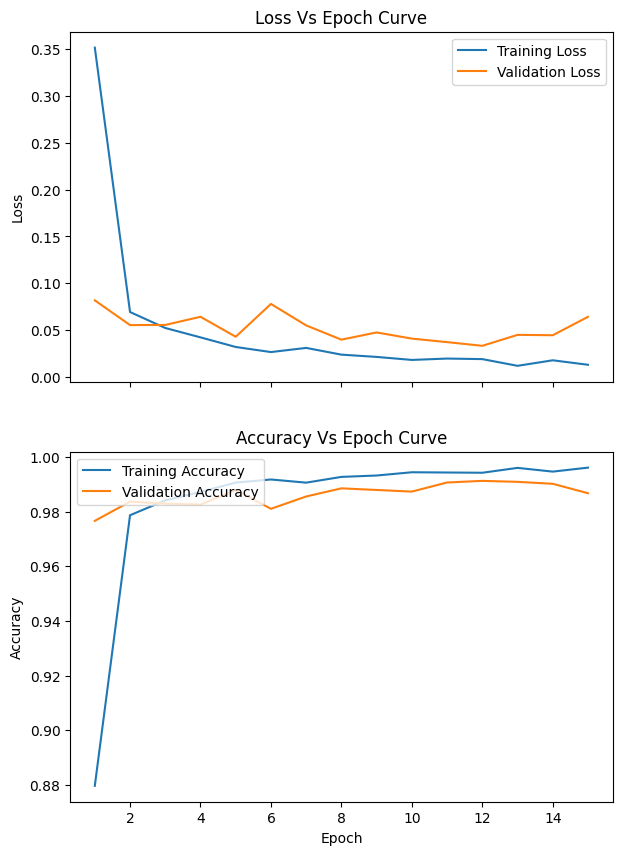

In [ ]:
plot_loss_accuracy_curve(history_6)

#### Prediction with the model

In [ ]:
y_prob = conv2d_model_2.predict(val_dataset)
y_prob[:3]

132/132 [==============================] - 2s 12ms/step


array([[9.9999917e-01, 4.2974728e-13, 7.2016161e-07, 2.7832183e-12,
        3.1304120e-10, 2.2494505e-10, 2.1518536e-08, 3.1097038e-09,
        7.9940921e-10, 1.6624993e-07],
       [7.7210487e-13, 1.4119116e-14, 2.2218643e-13, 1.9436823e-13,
        1.7768676e-15, 1.6013658e-09, 1.0000000e+00, 1.1607262e-19,
        1.7983514e-11, 3.0406867e-15],
       [1.5809621e-13, 4.7239590e-10, 2.1738369e-10, 3.8841144e-12,
        1.6374168e-12, 5.9936668e-14, 1.2611068e-17, 1.0000000e+00,
        5.1926649e-12, 1.2530200e-09]], dtype=float32)

In [ ]:
y_pred = tf.argmax(y_prob, axis=1).numpy()
y_pred[:10]

array([0, 6, 7, 6, 4, 3, 2, 9, 3, 7])

#### Plot confusion matrix

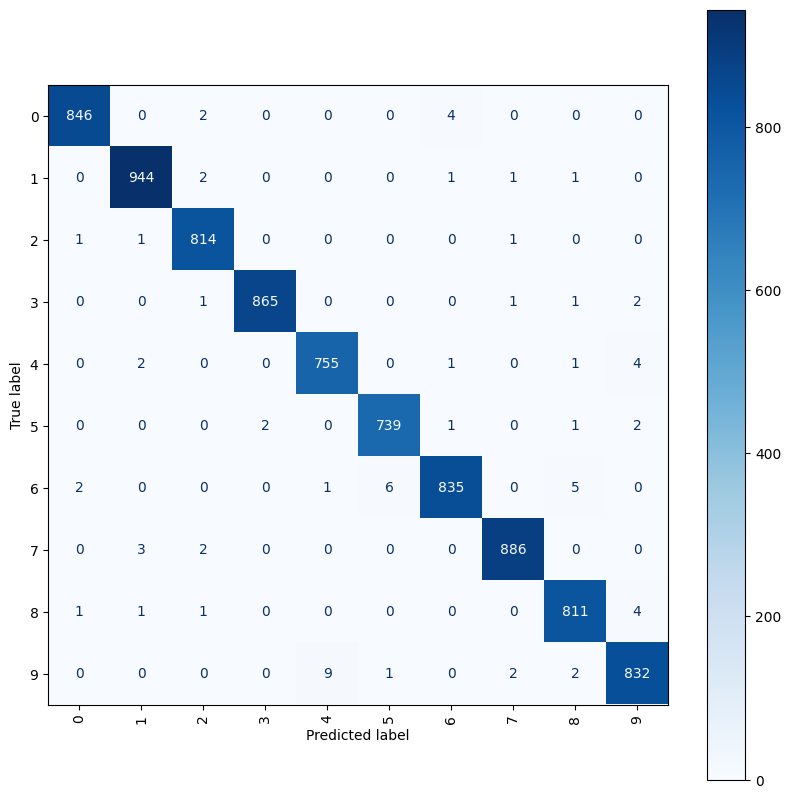

In [ ]:
plot_confusion_matrix(y_true, y_pred)

#### Adding score to overall results

In [ ]:
conv2d_model_2_results = calculate_results('Conv2D Model 2', y_true, y_pred)
overall_results.append(conv2d_model_2_results)
conv2d_model_2_results

{'Model Name': 'Conv2D Model 2',
 'Accuracy score': 0.9913095238095239,
 'Precision score': 0.9913154137288815,
 'Recall score': 0.9913095238095239,
 'F1 score': 0.9913083827096818}

### Compare all the models

In [ ]:
results_df = pd.DataFrame(overall_results)
results_df

,Model Name,Accuracy score,Precision score,Recall score,F1 score
0,Dense Model 1,0.957262,0.957547,0.957262,0.957301
1,Dense Model 2,0.957262,0.957547,0.957262,0.957301
2,Conv1D Model 1,0.981071,0.981111,0.981071,0.981063
3,Conv1D Model 2,0.982738,0.982790,0.982738,0.982742
4,Conv2D Model 1,0.921667,0.921889,0.921667,0.921561
5,Conv2D Model 2,0.991310,0.991315,0.991310,0.991308


In [ ]:
labels = results_df['Model Name'].to_list()
labels

['Dense Model 1',
 'Dense Model 2',
 'Conv1D Model 1',
 'Conv1D Model 2',
 'Conv2D Model 1',
 'Conv2D Model 2']

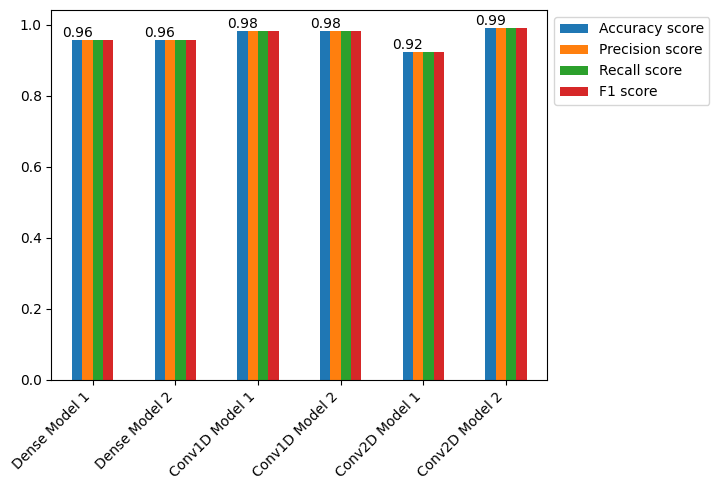

In [ ]:
ax = results_df.plot(kind='bar')
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend(bbox_to_anchor=(1, 1))
ax.bar_label(ax.containers[0], fmt='%.2f');

### Save the best model

In [ ]:
conv2d_model_2.save('/content/drive/MyDrive/Colab Notebooks/Machine Learning Projects/ImageClassification/1. Digit Recognizer/Best_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Load the saved model

In [ ]:
saved_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Machine Learning Projects/ImageClassification/1. Digit Recognizer/Best_model.h5')

In [ ]:
saved_model.evaluate(val_dataset)

132/132 [==============================] - 414s 3s/step - loss: 0.0332 - accuracy: 0.9913


[0.03316950798034668, 0.9913095235824585]

### Predict for test data

In [ ]:
y_prob = saved_model.predict(test_dataset)
y_prob[:3]

438/438 [==============================] - 6s 13ms/step


array([[3.14134031e-11, 2.18044246e-11, 1.00000000e+00, 1.74281745e-09,
        4.84039155e-08, 2.07440828e-10, 6.40170642e-13, 9.48343071e-11,
        2.05704065e-10, 1.04246146e-10],
       [9.99999881e-01, 4.62985227e-13, 5.46802283e-08, 5.26677616e-12,
        4.18568860e-11, 3.17423465e-09, 8.47637622e-08, 2.65528636e-12,
        1.37874184e-10, 4.53739695e-08],
       [1.11332006e-10, 3.34633168e-12, 4.02227549e-08, 1.06466047e-09,
        6.19639786e-06, 1.93951322e-09, 3.00424303e-11, 2.52666443e-10,
        1.12425857e-06, 9.99992728e-01]], dtype=float32)

In [ ]:
y_pred = tf.cast(tf.argmax(y_prob, axis=1), tf.int64).numpy()
y_pred[:10]

array([2, 0, 9, 0, 3, 7, 0, 3, 0, 3])

In [ ]:
len(y_pred), len(test_df.index)

(28000, 28000)

In [ ]:
submission_df = pd.DataFrame({
    'ImageId': test_df.index,
    'Label': y_pred
})

submission_df.head()

,ImageId,Label
0,0,2
1,1,0
2,2,9
3,3,0
4,4,3


In [ ]:
submission_df.to_csv('Submission.csv', index=False)

In [ ]:
submission = pd.read_csv('Submission.csv')
submission.head()

,ImageId,Label
0,0,2
1,1,0
2,2,9
3,3,0
4,4,3


In [ ]:
submission['ImageId'] = submission['ImageId'] + 1
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [ ]:
submission.to_csv('Submission.csv', index=False)

### Most Wrong Predictions

In [ ]:
y_pred = tf.argmax(saved_model.predict(val_dataset), axis=1).numpy()
y_pred[:10]

132/132 [==============================] - 430s 3s/step


array([0, 6, 7, 6, 4, 3, 2, 9, 3, 7])

In [ ]:
y_true = np.array(y_val.to_list())
y_true[:10]

array([0, 6, 7, 6, 4, 3, 2, 9, 3, 7])

In [ ]:
predictions_df = pd.DataFrame({
    'Y_true': y_true,
    'Y_pred': y_pred,
}, index=X_val.index)

predictions_df.head()

,Y_true,Y_pred
9658,0,0
19009,6,6
5661,7,7
14100,6,6
14808,4,4


In [ ]:
predictions_df['Prediction'] = predictions_df['Y_pred'] == predictions_df['Y_true']

predictions_df.head()

,Y_true,Y_pred,Prediction
9658,0,0,True
19009,6,6,True
5661,7,7,True
14100,6,6,True
14808,4,4,True


In [ ]:
X_val.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
9658,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5661,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14808,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
prediction_df = pd.concat([predictions_df, X_val], axis=1)
prediction_df.head()

,Y_true,Y_pred,Prediction,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
9658,0,0,True,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19009,6,6,True,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5661,7,7,True,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14100,6,6,True,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14808,4,4,True,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
wrong_df = prediction_df[prediction_df['Prediction'] == False]
wrong_df.head()

,Y_true,Y_pred,Prediction,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41221,9,4,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37706,3,2,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5338,6,5,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23604,4,9,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5747,8,9,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


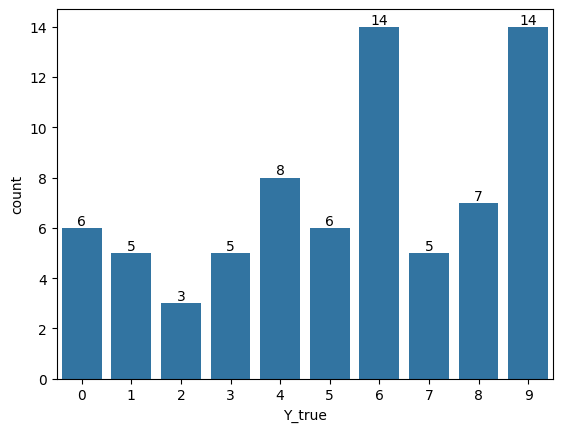

In [ ]:
ax = sns.countplot(wrong_df, x='Y_true')
ax.bar_label(ax.containers[0]);

In [ ]:
wrong_images = []

for _, row in wrong_df.iterrows():
    true = row[0]
    pred = row[1]
    predict = row[2]
    pixel = np.array(row[3:], dtype=np.float64).reshape((28, 28)) / 255.

    wrong_images.append((true, pred, predict, pixel))

In [ ]:
wrong_images[:1]

[(9,
  4,
  False,
  array([[0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0

In [ ]:
(len(wrong_images) / len(X_val)) * 100

0.8690476190476191

**About Data:**
> Less than 1% of data predicted by the model is wrong i.e., around `0.87%`

### Plot most wrong predictions

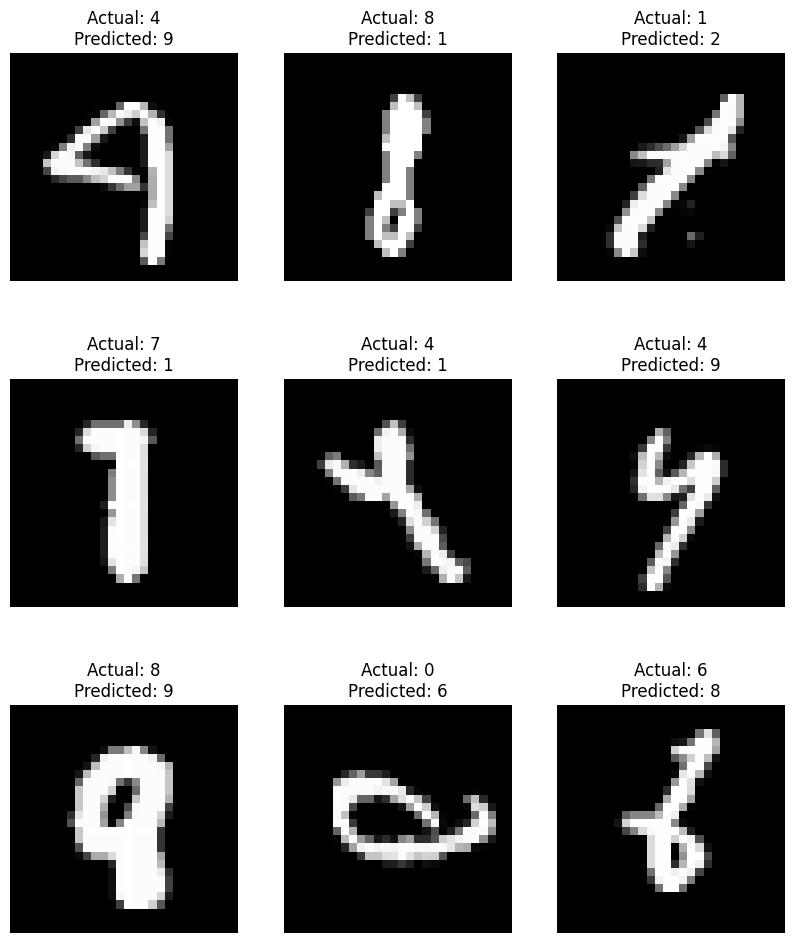

In [ ]:
size = len(wrong_images)

fig, ax = plt.subplots(3, 3, figsize=(10, 12))
for i in range(3):
    for j in range(3):
        rand = np.random.randint(0, size)
        true = wrong_images[rand][0]
        pred = wrong_images[rand][1]
        img = wrong_images[rand][3]

        ax[i][j].set_title(f'Actual: {true}\nPredicted: {pred}')
        ax[i][j].imshow(img, cmap=plt.cm.binary_r)
        ax[i][j].axis(False)